In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import ttest_ind
from tqdm import tqdm

# set random seed
np.random.seed(42)

## Hypothesis test

A hypothesis test (or test of significance) is a statistical method used to make decisions based on data. It involves making an initial assumption (the null hypothesis, $H_0$) and then assessing the evidence against that assumption to determine if a different hypothesis (the alternative hypothesis, $H_a$) might be more accurate.

Below, we use the coin toss example discussed in class, and generate the null distribution (the distribution of the test statistic if the null hypothesis is true).

In [2]:
# fair coin, binomial test
n = 10
p = 0.5
for k in range(11):
    proba = binom.pmf(k=k, n=n, p=p)
    print(f"The probability of getting {k} head(s) is: {proba:5.3f}")

The probability of getting 0 head(s) is: 0.001
The probability of getting 1 head(s) is: 0.010
The probability of getting 2 head(s) is: 0.044
The probability of getting 3 head(s) is: 0.117
The probability of getting 4 head(s) is: 0.205
The probability of getting 5 head(s) is: 0.246
The probability of getting 6 head(s) is: 0.205
The probability of getting 7 head(s) is: 0.117
The probability of getting 8 head(s) is: 0.044
The probability of getting 9 head(s) is: 0.010
The probability of getting 10 head(s) is: 0.001


Below, we use the IQ test example discussed in the class. 

Specifically, we will plot the null distribution (the IQ mean is 100), as well as the alternative distribution (the IQ mean is 105). 

The critial value is 107.802.
The power of the test is 0.277.


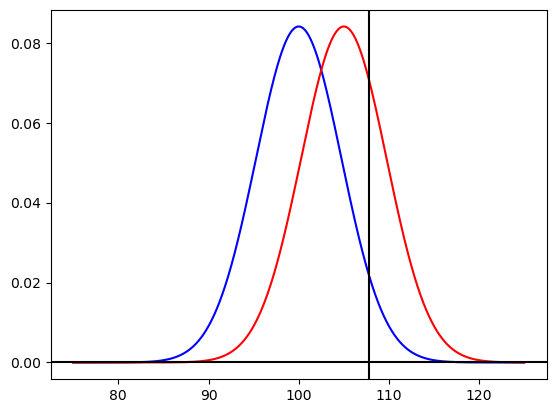

In [3]:
# IQ example
n = 10
mu_0 = 100
mu_a = 105
sigma = 15
alpha = 0.05  # Type I error rate


x_range = np.arange(75, 125, 0.001)
plt.plot(
    x_range, 
    norm.pdf(x_range, loc=mu_0, scale=np.sqrt(sigma**2 / n)),
    color="blue",
    label="H_0"
)

plt.plot(
    x_range, 
    norm.pdf(x_range, loc=mu_a, scale=np.sqrt(sigma**2 / n)),
    color="red",
    label="H_a"
)

# find the rejection region
x_critical = norm.ppf(q=(1 - alpha), loc=mu_0, scale=np.sqrt(sigma**2 / n))
power = norm.sf(x=x_critical, loc=mu_a, scale=np.sqrt(sigma**2 / n))

print(f"The critial value is {x_critical:5.3f}.")
print(f"The power of the test is {power:5.3f}.")
plt.axvline(x=x_critical, color="black")

plt.axhline(y=0, color="black")
plt.show()

In [4]:
# Get the p-value
test_statistic = 110
norm.sf(x=test_statistic, loc=100, scale=np.sqrt(15**2 / n))

0.017507490509831244

## 2-sample test

The 2-sample test, also known as 2-sample t-test, or the independent samples t-test, is used to test whether the means of two independent groups are significantly different from each other. It's commonly applied when you have two separate groups and you want to determine if their population means on some measure are different.

In the follow example, we test the difference between 150 samples from group 1, with sample mean of 100, sample standard deviation of 10, and 150 samples from group 2, with sample mean of 103, sample standard deviation of 10. We want to answer the question: is the group 1 significantly different from group 2, namely, is the population mean where group 1 is drawn from, is different from that of group 2?

The critial value is 1.960.
The test statistic is 2.598.


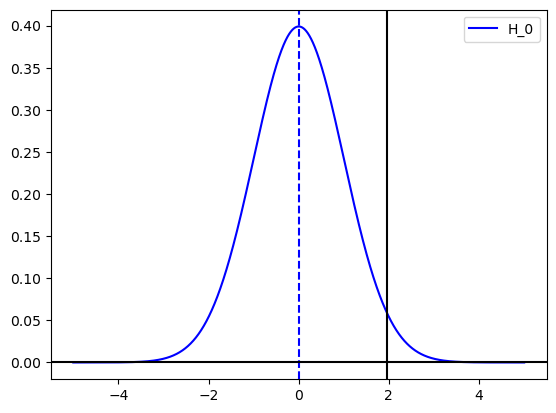

In [5]:
# 2-sample test
x_mean = 100
y_mean = 103
s_x = 10
s_y = 10
n_x = 150
n_y = 150

delta = y_mean - x_mean
alpha = 0.05

s_pool = np.sqrt(s_x**2 / n_x + s_y**2 / n_y)
t_stat = delta / s_pool

z_range = np.arange(-5, 5, 0.001)
plt.plot(
    z_range, 
    norm.pdf(z_range, loc=0, scale=1),
    color="blue",
    label="H_0"
)

# use q=(1 - alpha) for one-sided test, to find the critical value
z_critical = norm.ppf(q=(1 - alpha / 2))

print(f"The critial value is {z_critical:5.3f}.")
print(f"The test statistic is {t_stat:5.3f}.")

plt.axvline(x=z_critical, color="black")
plt.axvline(x=0, color="blue", linestyle="--")
plt.axhline(y=0, color="black")
plt.legend()
plt.show()

## Multiple hypothesis testing

Multiple hypothesis testing refers to the situation in which several hypothesis tests are performed simultaneously on the same dataset. This can be common in fields like genomics, where thousands or even millions of tests might be conducted at once (for example, testing the association of each of many genes with a particular disease). However, conducting multiple tests introduces some challenges.

The more hypothesis tests you perform, the higher the chance of encountering a false positive. For example, if you're testing 100 independent hypotheses and you're using a significance level of $\alpha = 0.05$, you'd expect to have about 5 false positives simply by chance, even if all null hypotheses are true.

Below we will demonstrate this issue numerically. We create 2 identical population, group A and group B. Then we conduct 100 2-sample t-tests, between one sample drawn from group A, and other other drawn from group B. Since we know, statistically, group A and group B are identical. Therefore, significant result (p-value less than 0.05) from any of the 2-sample t-test is an issue (false positive).

In [6]:
# multiple tests
np.random.seed(42)
n_samples = 10_000

group_A = np.random.normal(size=n_samples)
group_B = np.random.normal(size=n_samples)

print(ttest_ind(a=group_A, b=group_B))

Ttest_indResult(statistic=-1.1055656789830124, pvalue=0.2689278520062849)


In [7]:
# assign meaningless labels to each sample
n_labels = 100
group_A_labeled = [(i % n_labels, x) for i, x in enumerate(group_A)]
group_B_labeled = [(i % n_labels, x) for i, x in enumerate(group_B)]

# run t-tests by label
p_values = []
t_statistics = []
for i in tqdm(range(n_labels)):
    t_statistic, p_value =  ttest_ind(
        a=[x for label, x in group_A_labeled if label == i], 
        b=[x for label, x in group_B_labeled if label == i]
    )
    t_statistics.append(t_statistic)
    p_values.append(p_value)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 188.26it/s]


Smallest p_values are:
[0.0016280947657787582, 0.010385926256902432, 0.011904779987561197, 0.028869509284429475, 0.04459902652806252]


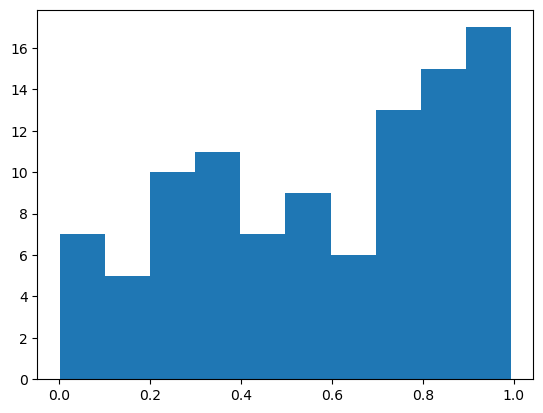

In [8]:
print("Smallest p_values are:")
print(sorted(p_values)[:5])
plt.hist(x=p_values)
plt.show()